In [1]:
### import necessary libraries 

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import imblearn

import warnings                    
warnings.filterwarnings('ignore')   ### this will ignore the warnings and we can look at much greener notebook 
                                    ### but I would recommend you to implement it at last because sometime warnings are good

# Exploratory Data Analysis

In [3]:
df = pd.read_csv("stroke_data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
## df.bmi.describe()

In [7]:
# min_threshold = df['bmi'].quantile(0.001)
# max_threshold = df['bmi'].quantile(0.999)
# df[df['bmi']>max_threshold]

In [8]:
df.dropna(inplace = True)
df.shape

(4909, 12)

In [9]:
print("Gender : ", df['gender'].unique())

print("ever_married : ", df['ever_married'].unique())

print("Work Type : ", df['work_type'].unique())

print("Residence : ", df['Residence_type'].unique())

print("Smoking : ", df['smoking_status'].unique())

Gender :  ['Male' 'Female' 'Other']
ever_married :  ['Yes' 'No']
Work Type :  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence :  ['Urban' 'Rural']
Smoking :  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [10]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

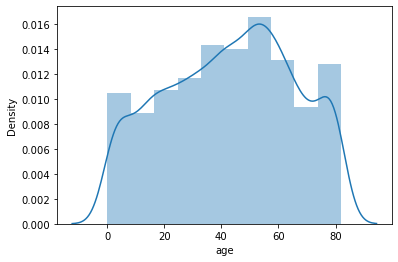

In [11]:
sns.distplot(df['age'], bins=10)  #rwidth=0.8
plt.show

In [12]:
df.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

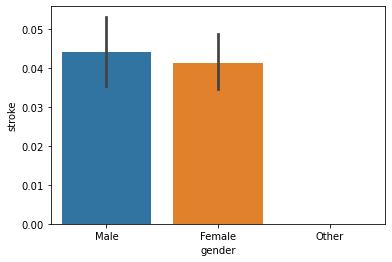

In [13]:
sns.barplot(df['gender'], df['stroke'])
plt.show()

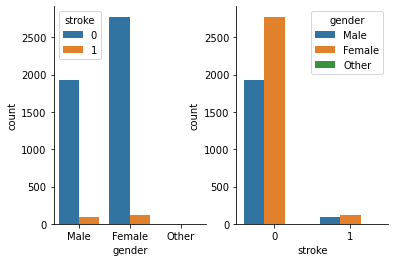

In [43]:
plt.subplot(1, 2, 1)

sns.countplot(x='gender', hue='stroke', data=df)
sns.despine()

plt.subplot(1, 2, 2)
sns.countplot(x='stroke', hue='gender', data=df)
sns.despine()

plt.show()

In [29]:
df.ever_married.value_counts()

Yes    3204
No     1705
Name: ever_married, dtype: int64

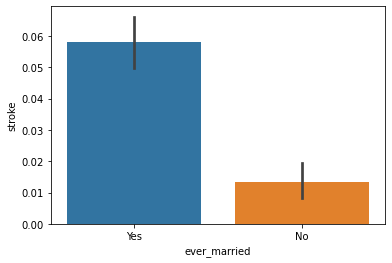

In [30]:
sns.barplot(df['ever_married'], df['stroke'])
plt.show()

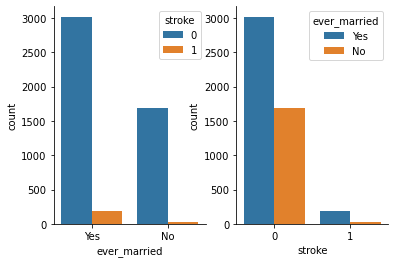

In [31]:
plt.subplot(1, 2, 1)

sns.countplot(x='ever_married', hue='stroke', data=df)
sns.despine()

plt.subplot(1, 2, 2)
sns.countplot(x='stroke', hue='ever_married', data=df)
sns.despine()

plt.show()

In [32]:
df.work_type.value_counts()

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

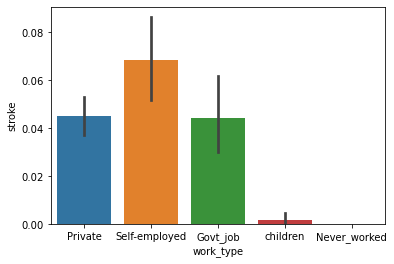

In [33]:
sns.barplot(df['work_type'], df['stroke'])
plt.show()

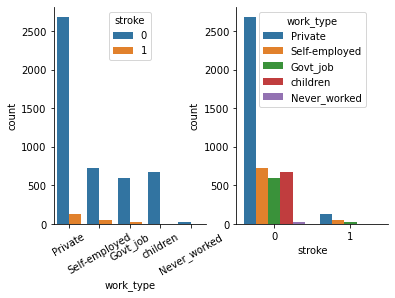

In [40]:
plt.subplot(1, 2, 1)

sns.countplot(x='work_type', hue='stroke', data=df)
plt.xticks(rotation=30)
sns.despine()

plt.subplot(1, 2, 2)
sns.countplot(x='stroke', hue='work_type', data=df)
sns.despine()

plt.show()

In [44]:
df.Residence_type.value_counts()

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

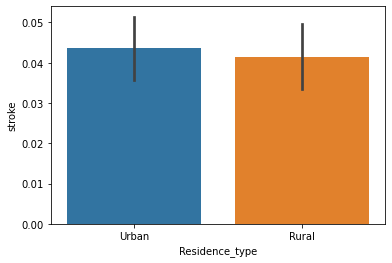

In [45]:
sns.barplot(df['Residence_type'], df['stroke'])
plt.show()

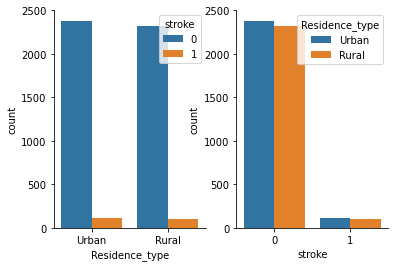

In [46]:
plt.subplot(1, 2, 1)

sns.countplot(x='Residence_type', hue='stroke', data=df)
sns.despine()

plt.subplot(1, 2, 2)
sns.countplot(x='stroke', hue='Residence_type', data=df)
sns.despine()

plt.show()

In [47]:
df.smoking_status.value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

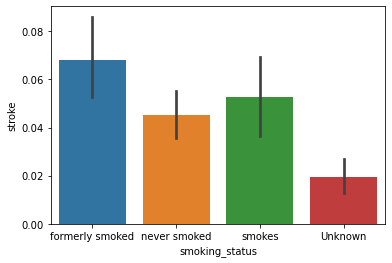

In [48]:
sns.barplot(df['smoking_status'], df['stroke'])
plt.show()

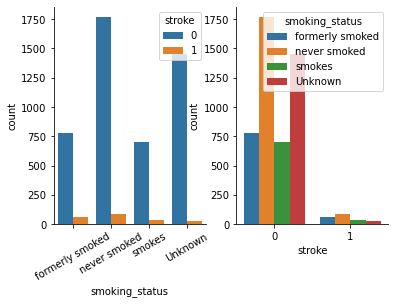

In [51]:
plt.subplot(1, 2, 1)

sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.xticks(rotation=30)
sns.despine()

plt.subplot(1, 2, 2)
sns.countplot(x='stroke', hue='smoking_status', data=df)
sns.despine()

plt.show()

In [52]:
df.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

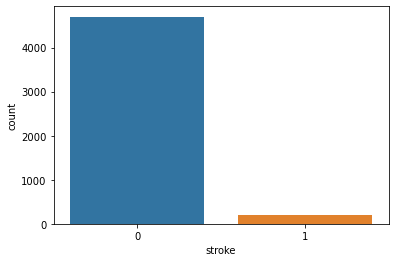

In [53]:
sns.countplot(df['stroke'], data=df)
plt.show()

## Its clear that the data is imbalanced, so we'll handle it in Feature Engineering Section

## Feature Engineering

### Handle Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

### Label Encoder will help us to rank attributes in a feature 

In [ ]:
dummies = pd.get_dummies(df['gender'])   

### dummies will convert attribute in numeric value

In [ ]:
df['ever_married']=le.fit_transform(df.ever_married)

df['work_type']=le.fit_transform(df.work_type)

df['Residence_type']=le.fit_transform(df.Residence_type)

df['smoking_status']=le.fit_transform(df.smoking_status)

In [ ]:
data = pd.concat([df, dummies], axis=1)
data.head()

In [ ]:
dataset = data.drop(['id', 'gender', 'Other'], axis=1)

In [ ]:
dataset.head()

In [ ]:
dataset.shape

### Handling Imbalanced Data

In [ ]:
## Splitting data into independent and dependent variables

X = dataset.drop(['stroke'], axis=1)
Y = dataset.stroke

In [ ]:
X.head()

In [ ]:
Y.head()

In [ ]:
print(X.shape)
print(Y.shape)

In [ ]:
Y.value_counts()   ### here we can clearly see that the data is highly imbalanced 
                   ### we have to make it balanced so that our model is not biased to any output

In [ ]:
from imblearn.combine import SMOTETomek   ## this library will help us to "over sample" the data 

In [ ]:
stk = SMOTETomek(random_state=42)

X_res,y_res = stk.fit_resample(X,Y)

In [ ]:
print(X_res.shape)

print(y_res.shape)

In [ ]:
from collections import Counter

print('Original dataset shape {}'.format(Counter(Y)))

print('Resampled dataset shape {}'.format(Counter(y_res)))

# Model Creation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3)

In [ ]:
X_train.head()

In [ ]:
y_train.value_counts()  ### now the data is balanced and this will lead us to better accuracy

In [ ]:
### This step gives us an opportunity to drop highly correlated independent features so that we can save OUR model from 
### CURSE OF DIMENSIONALITY


#get correlations of each features in dataset

corr = X_train.corr()
plt.figure(figsize=(15,10))

#plot heat map

sns.heatmap(corr, annot=True)
plt.show() 

In [ ]:
### There are no such independent features who are highly correlated to each other

In [ ]:
### Cross Validation 

from sklearn.model_selection import RandomizedSearchCV

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc_model = RandomForestClassifier()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf = [1, 2, 5, 10]

In [ ]:
rfc_random_grid={
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'min_samples_leaf' : min_samples_leaf
}

In [ ]:
rfc_random = RandomizedSearchCV(estimator = rfc_model, param_distributions = rfc_random_grid, n_iter = 10, cv = 5, return_train_score=False)

In [ ]:
rfc_random.fit(X_train, y_train)

In [ ]:
rfc_prediction = rfc_random.predict(X_test)

In [ ]:
 from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print("Accuracy Score")
print(accuracy_score(y_test, rfc_prediction))

print('*'*50)

print("Classification Report\n")
print(classification_report(y_test, rfc_prediction))

print('*'*50)

print("Confusion Matrix\n")
print(confusion_matrix(y_test, rfc_prediction))

# **In conclusion, Achieved an accuracy of 95%.**

### I have tried to implement the basic steps of life cycle of a Data Science Project.

### Feel free to give any comments about my notebook!

### Also, if my notebook was helpful, please give me an upvote !!!!!